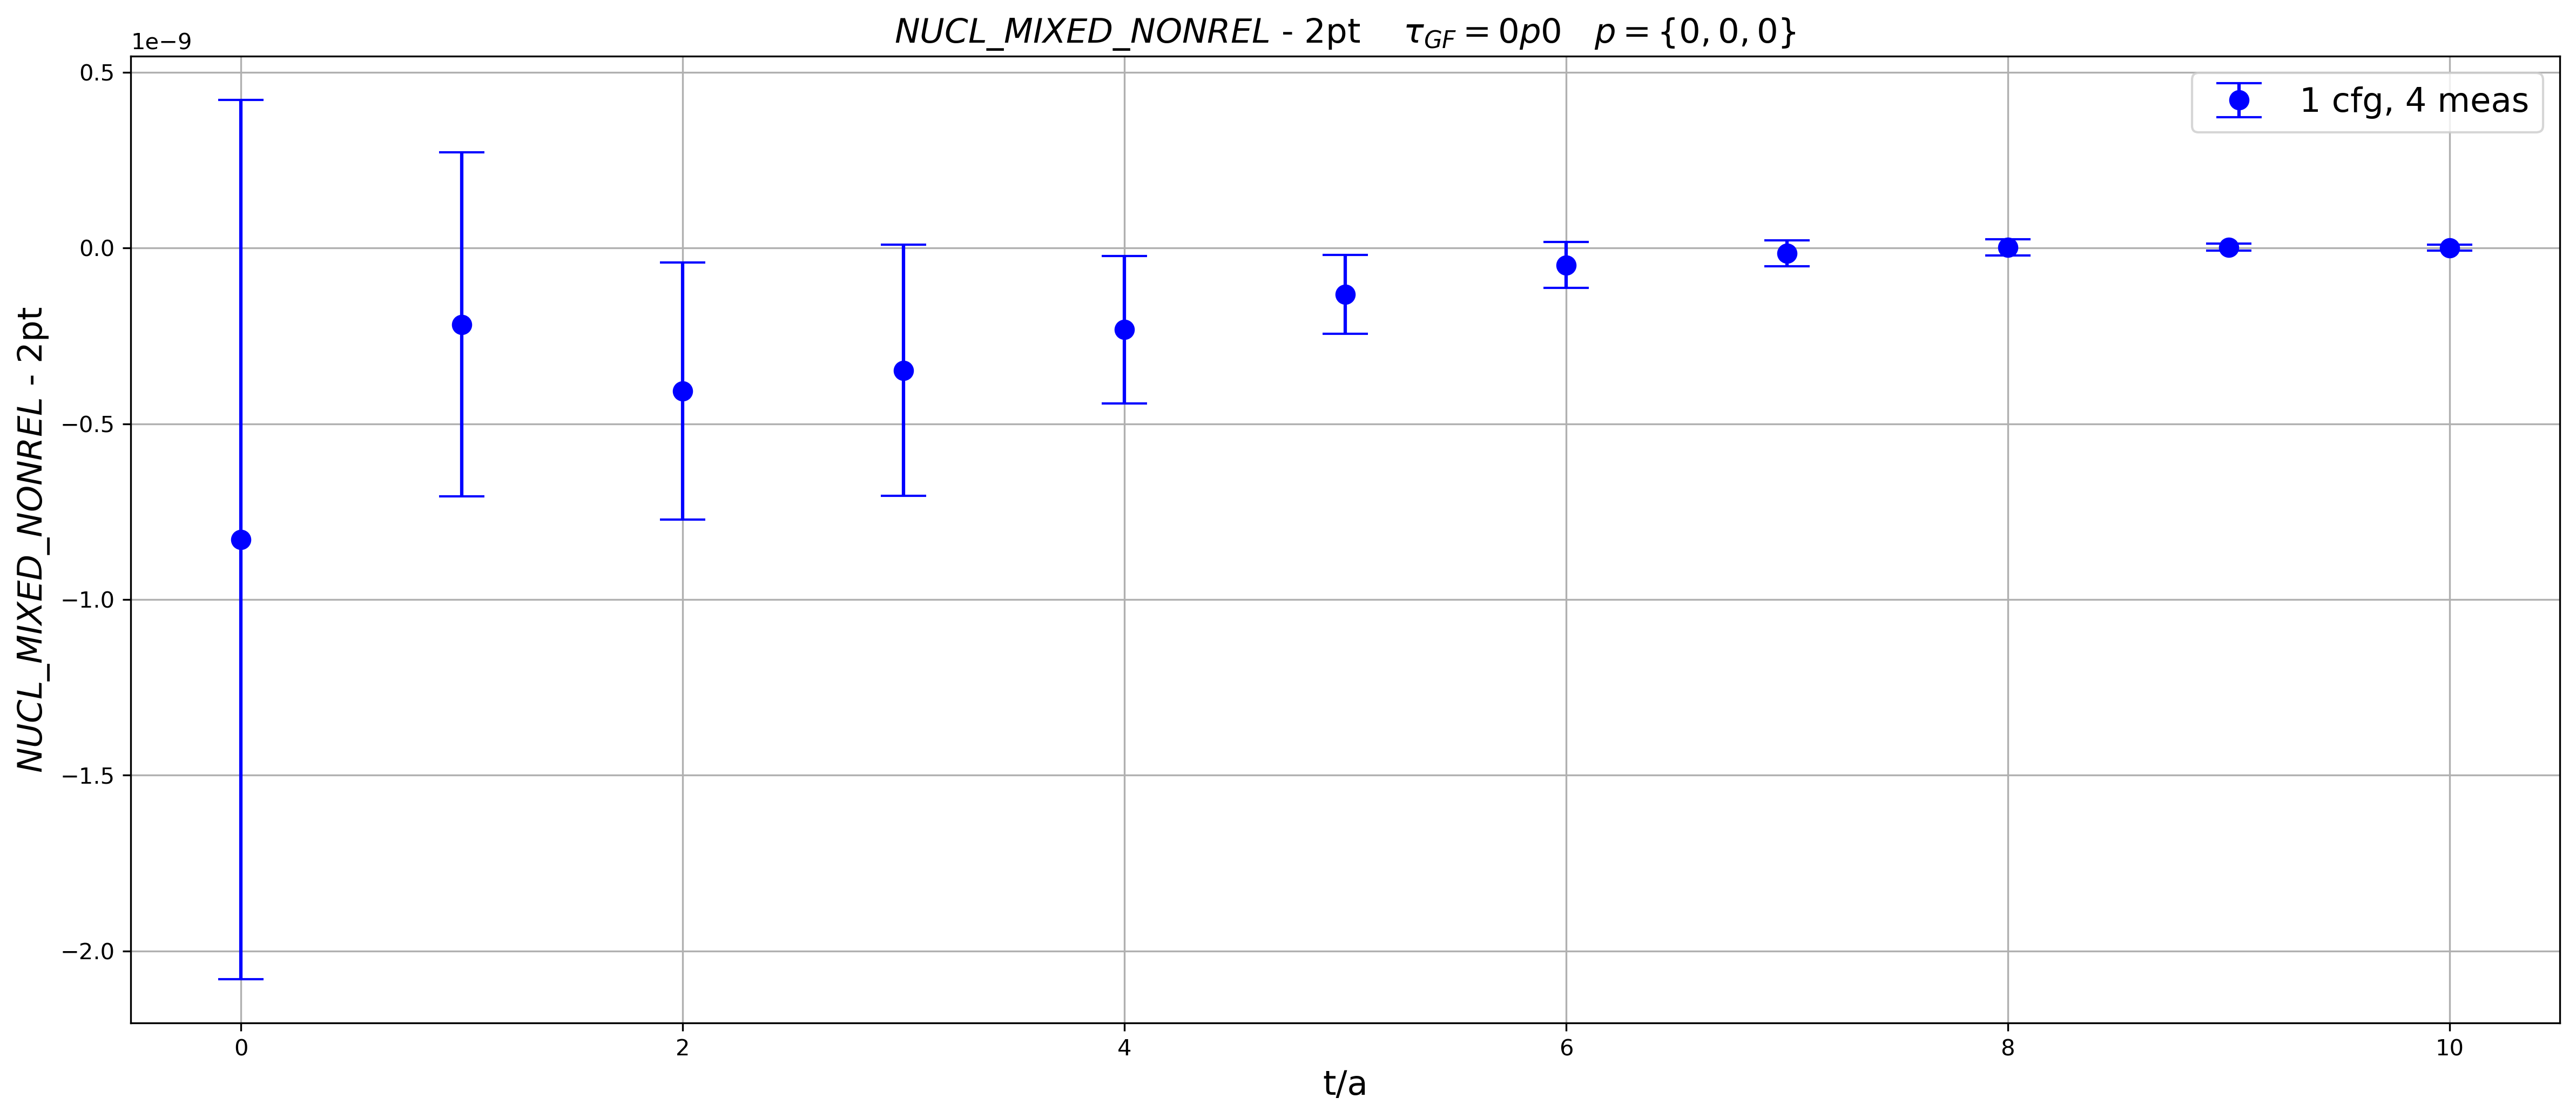

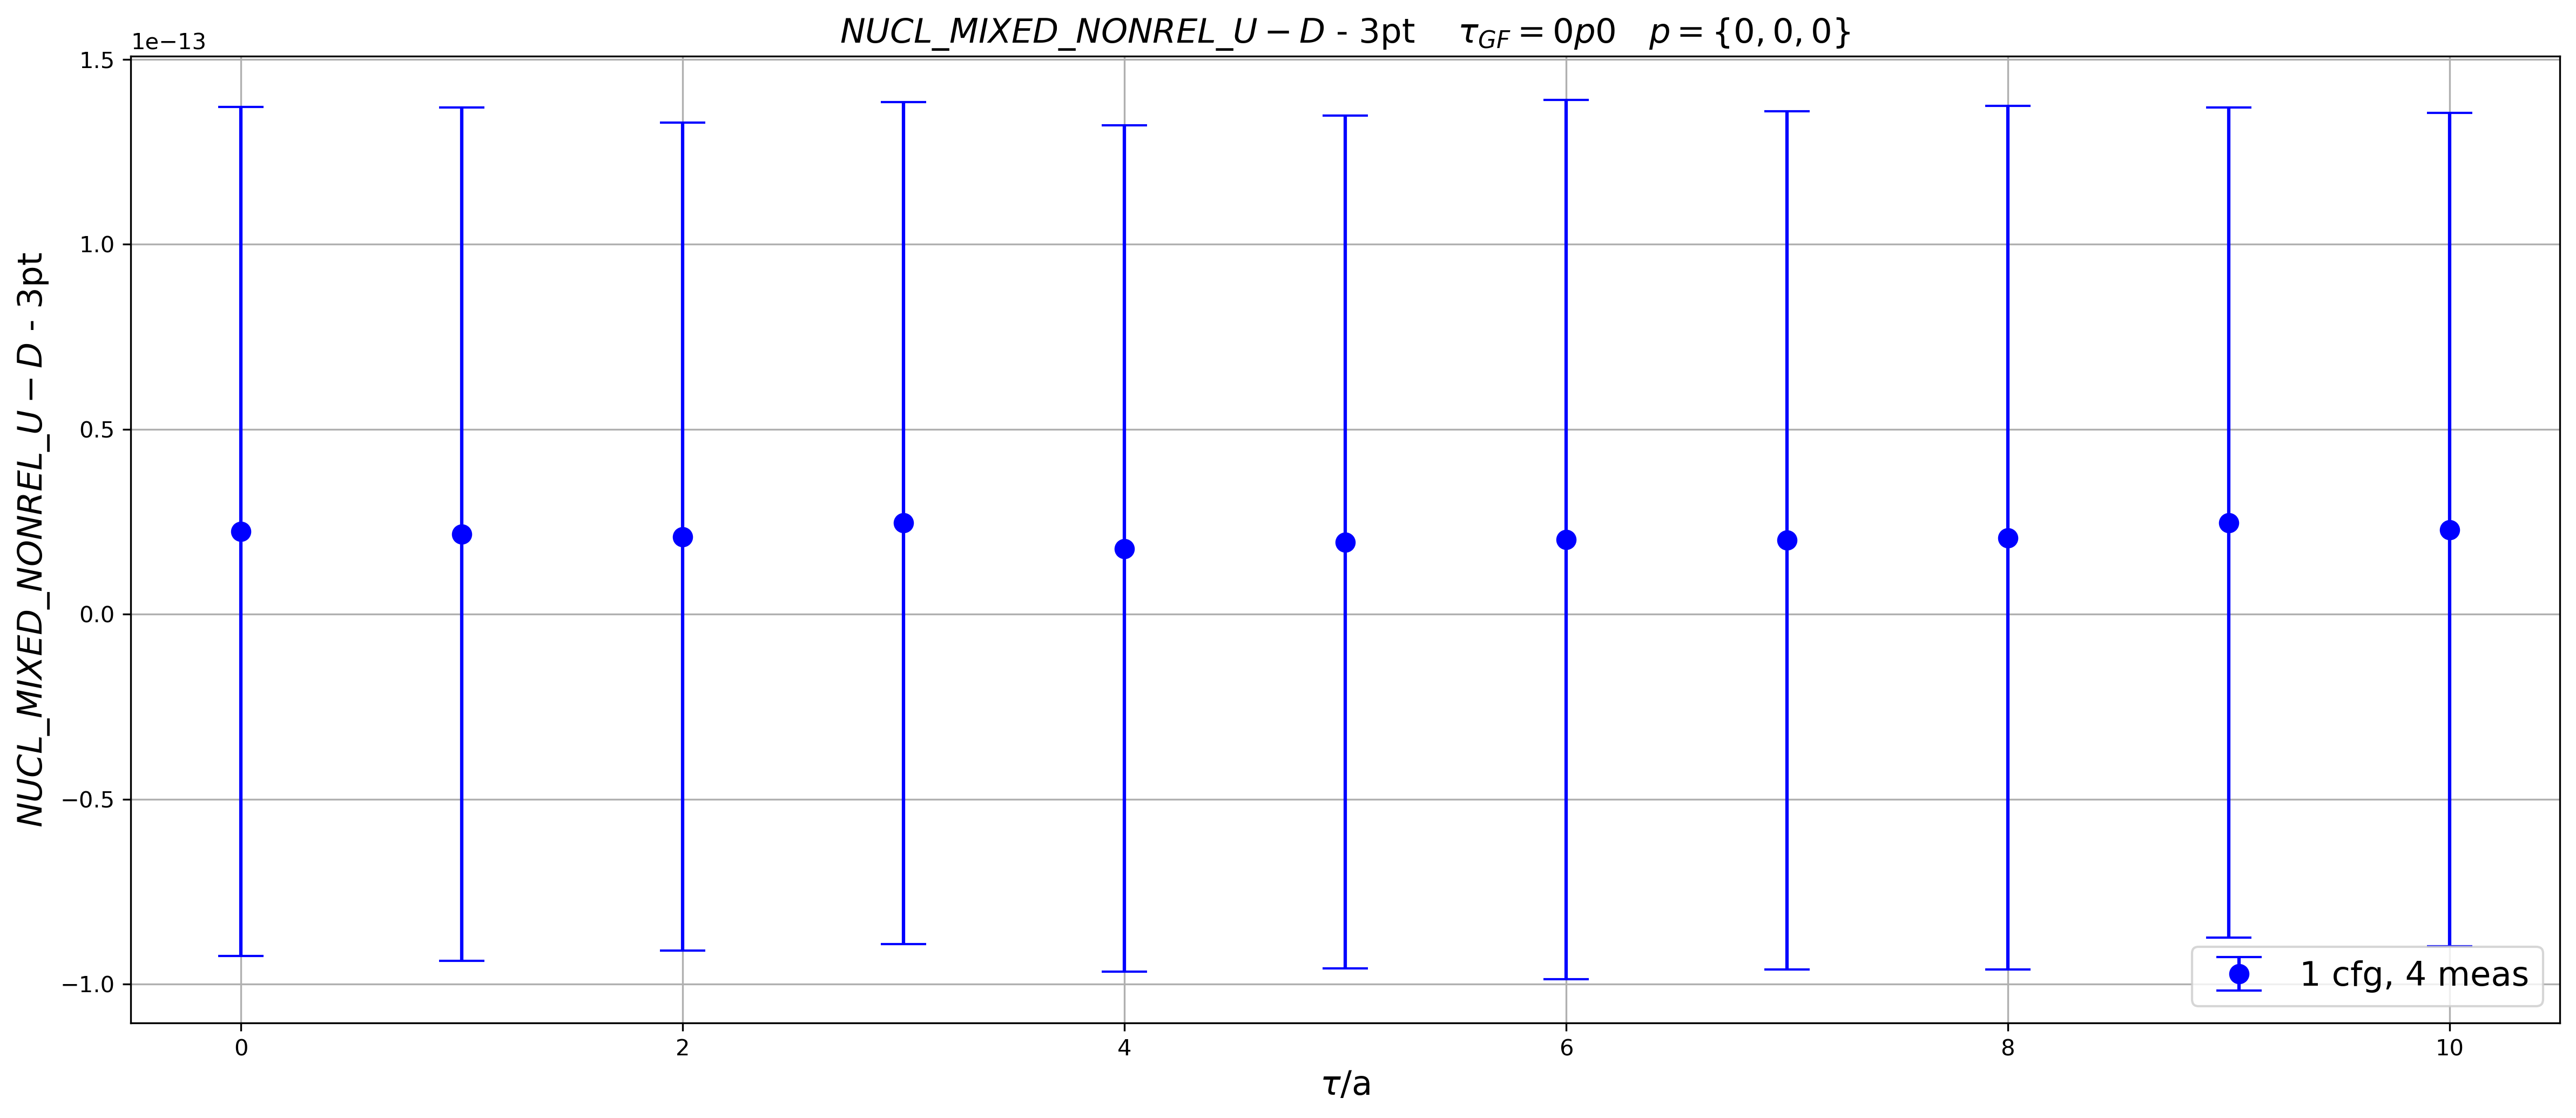

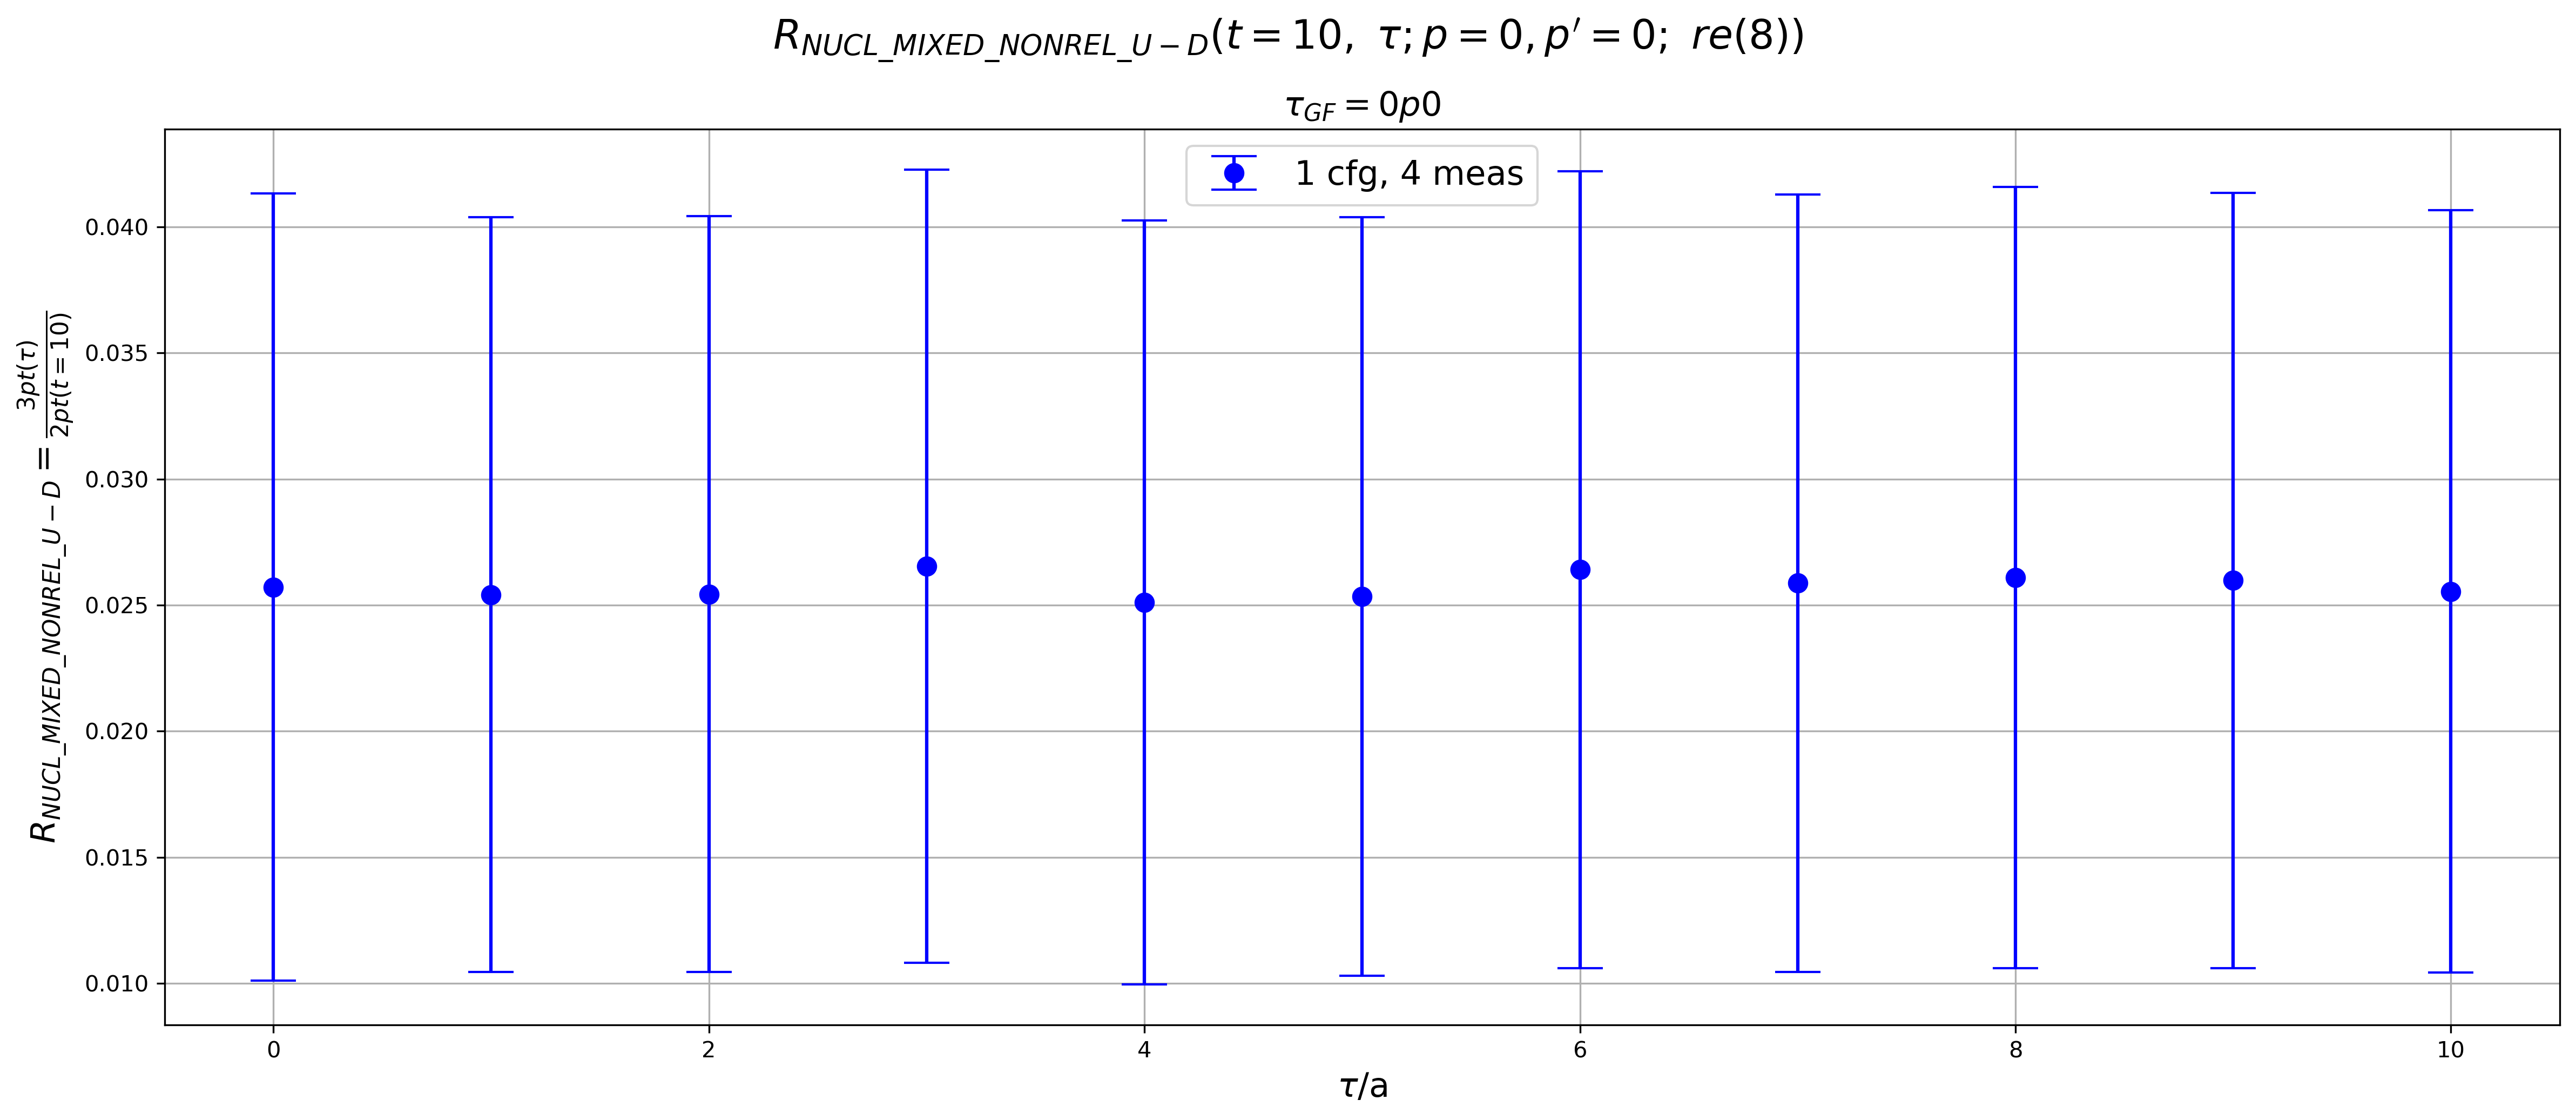

In [2]:
import xml.etree.ElementTree as ET
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import h5py
# Parse the XML file


def Jackknife(datalist):
    N = len(datalist)
    theta_bar = np.mean(datalist)
    theta_nminus_theta_bar = []
    for i in range(len(datalist)): #Jackknife
        sliced_list = datalist[:(i)] + datalist[(i+1):]
        theta_n = np.mean(sliced_list)
        theta_nminus_theta_bar.append(np.square(theta_n-theta_bar))
    sigma_sq = ((N-1)/N)*np.sum(theta_nminus_theta_bar)
    return(theta_bar, np.sqrt(sigma_sq))


def plot_pion_2pt_flow0(snk_time, WFt):
    #tree = ET.parse(f"/pscratch/sd/h/hari_8/nEDM_project_LANL/FLOWED_{WFt}_hadspec_Pavg_.cfg12000_t0x15y3z4_t42x31y3z4_t84x47y3z4_STOUSM.dat.xml")
    tree = ET.parse(f"/pscratch/sd/h/hari_8/nEDM_project_LANL/hadspec_Pavg_cl21_48_128_b6p3_m0p2390_m0p2050.0_18448_t28x33y36z28_t60x45y36z28_t92x33y36z28_t124x45y36z28_HP.dat.xml")
    root = tree.getroot()
    values = []
    for elem in root.findall(".//Shell_Point_Wilson_Baryons/elem[baryon_num='16']/momenta/elem[sink_mom_num='0']/barprop/"):
        Num_value = elem.find("im").text
        values.append(float(Num_value))
    data = np.array(values)
    data1 = data[28-28:(28-28+(snk_time+1))]
    data2 = data[60-28:(60-28+(snk_time+1))]
    data3 = data[92-28:(92-28+(snk_time+1))]
    data4 = data[124-28:(124-28+(snk_time+1))]
    JK_value = []
    JK_err = []
    for tau in range(len(data1)):
        JK_value_err = Jackknife([data1[tau], data2[tau], data3[tau], data4[tau]])
        JK_value.append(JK_value_err[0])
        JK_err.append(JK_value_err[1])
    time_plt = np.arange(len(data1))
    plt.figure(figsize=(16, 7),dpi=300)
    plt.errorbar(time_plt, JK_value, yerr = JK_err, fmt='o', markersize=8, capsize=10, color='blue', label= "1 cfg, 4 meas")
    plt.xlabel("t/a", fontsize=15)
    plt.ylabel("${NUCL\\_MIXED\\_NONREL}$ - 2pt", fontsize=15)
    plt.title("${NUCL\\_MIXED\\_NONREL}$ - 2pt    $\\tau_{GF} = %s$   $p=\{0,0,0\}$"%(WFt), fontsize=15)
    plt.legend(fontsize=15)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.grid(True) 
    plt.show()
    print(" ")

def plot_pion_3pt_flow0(Gn, Num, snk_time, WFt):
    U_file_path = f"/pscratch/sd/h/hari_8/nEDM_project_LANL/WF0p0_NUCL_U_MIXED_NONREL3pt.h5"
    
    with h5py.File(U_file_path, "r") as h5_file: 
        U_path_to_observable_cfgb = f"//NUCL_l0_g{Gn}_qz+0_qy+0_qx+0/001"
        U_observable_cfgb = h5_file[U_path_to_observable_cfgb]
        U_values = U_observable_cfgb[Num][()]
    
    U_pt3_data = np.array(U_values)
    U_pt3_data1 = U_pt3_data[28:(28+(snk_time+1))]
    U_pt3_data2 = U_pt3_data[60:(60+(snk_time+1))]
    U_pt3_data3 = U_pt3_data[92:(92+(snk_time+1))]
    U_pt3_data4 = np.concatenate((U_pt3_data[124:], U_pt3_data[0:(snk_time + 1 - (len(U_pt3_data) - 124))]))

    D_file_path = f"/pscratch/sd/h/hari_8/nEDM_project_LANL/WF0p0_NUCL_D_MIXED_NONREL3pt.h5"
    
    with h5py.File(D_file_path, "r") as h5_file: 
        D_path_to_observable_cfgb = f"//NUCL_l0_g{Gn}_qz+0_qy+0_qx+0/001"
        D_observable_cfgb = h5_file[D_path_to_observable_cfgb]
        D_values = D_observable_cfgb[Num][()]
    
    D_pt3_data = np.array(D_values)
    D_pt3_data1 = D_pt3_data[28:(28+(snk_time+1))]
    D_pt3_data2 = D_pt3_data[60:(60+(snk_time+1))]
    D_pt3_data3 = D_pt3_data[92:(92+(snk_time+1))]
    D_pt3_data4 = np.concatenate((D_pt3_data[124:], D_pt3_data[0:(snk_time + 1 - (len(D_pt3_data) - 124))]))
    
    
    JK_value = []
    JK_err = []
    for tau in range(len(U_pt3_data1)):
        JK_value_err = Jackknife([(U_pt3_data1[tau]-D_pt3_data1[tau]), (U_pt3_data2[tau]-D_pt3_data2[tau]), (U_pt3_data3[tau]-D_pt3_data3[tau]), (U_pt3_data4[tau]-D_pt3_data4[tau])])
        JK_value.append(JK_value_err[0])
        JK_err.append(JK_value_err[1])
    
    time_plt = np.arange(len(U_pt3_data1))
    plt.figure(figsize=(16, 7), dpi=300)
    plt.errorbar(time_plt, JK_value, yerr=JK_err, fmt='o', markersize=8, capsize=10, color='blue', label="1 cfg, 4 meas")
    plt.xlabel("$\\tau$/a", fontsize=15)
    plt.ylabel("${NUCL\\_MIXED\\_NONREL\\_U-D}$ - 3pt", fontsize=15)
    plt.title("${NUCL\\_MIXED\\_NONREL\\_U-D}$ - 3pt    $\\tau_{GF} = %s$   $p=\\{0,0,0\\}$"%(WFt), fontsize=15)
    plt.legend(fontsize=15)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.grid(True)
    plt.show()
    
    print(" ")
    
def plot_pion_ratio_3pt2pt_flow0(Gn, Num, snk_time, WFt):
    U_file_path = f"/pscratch/sd/h/hari_8/nEDM_project_LANL/WF0p0_NUCL_U_MIXED_NONREL3pt.h5"
    
    with h5py.File(U_file_path, "r") as h5_file: 
        U_path_to_observable_cfgb = f"//NUCL_l0_g{Gn}_qz+0_qy+0_qx+0/001"
        U_observable_cfgb = h5_file[U_path_to_observable_cfgb]
        U_values = U_observable_cfgb[Num][()]
    
    U_pt3_data = np.array(U_values)
    U_pt3_data1 = U_pt3_data[28:(28+(snk_time+1))]
    U_pt3_data2 = U_pt3_data[60:(60+(snk_time+1))]
    U_pt3_data3 = U_pt3_data[92:(92+(snk_time+1))]
    U_pt3_data4 = np.concatenate((U_pt3_data[124:], U_pt3_data[0:(snk_time + 1 - (len(U_pt3_data) - 124))]))

    D_file_path = f"/pscratch/sd/h/hari_8/nEDM_project_LANL/WF0p0_NUCL_D_MIXED_NONREL3pt.h5"
    
    with h5py.File(D_file_path, "r") as h5_file: 
        D_path_to_observable_cfgb = f"//NUCL_l0_g{Gn}_qz+0_qy+0_qx+0/001"
        D_observable_cfgb = h5_file[D_path_to_observable_cfgb]
        D_values = D_observable_cfgb[Num][()]
    
    D_pt3_data = np.array(D_values)
    D_pt3_data1 = D_pt3_data[28:(28+(snk_time+1))]
    D_pt3_data2 = D_pt3_data[60:(60+(snk_time+1))]
    D_pt3_data3 = D_pt3_data[92:(92+(snk_time+1))]
    D_pt3_data4 = np.concatenate((D_pt3_data[124:], D_pt3_data[0:(snk_time + 1 - (len(D_pt3_data) - 124))]))
    
   
    pt2_tree = ET.parse(f"/pscratch/sd/h/hari_8/nEDM_project_LANL/hadspec_Pavg_cl21_48_128_b6p3_m0p2390_m0p2050.0_18448_t28x33y36z28_t60x45y36z28_t92x33y36z28_t124x45y36z28_HP.dat.xml")
    pt2_root = pt2_tree.getroot()
    pt2_values = []
    for elem in pt2_root.findall(".//Shell_Point_Wilson_Baryons/elem[baryon_num='16']/momenta/elem[sink_mom_num='0']/barprop/"):
        pt2_Num_value = elem.find("re").text
        pt2_values.append(float(pt2_Num_value))
    
    pt2_data = np.array(pt2_values)
    pt2_data1 = pt2_data[(28-28+(snk_time+1))]
    pt2_data2 = pt2_data[(60-28+(snk_time+1))]
    pt2_data3 = pt2_data[(92-28+(snk_time+1))]
    pt2_data4 = pt2_data[(124-28+(snk_time+1))]
    
    
    JK_value = []
    JK_err = []
    for tau in range(len(U_pt3_data1)):
        JK_value_err = Jackknife([(U_pt3_data1[tau]-D_pt3_data1[tau])/pt2_data1, (U_pt3_data2[tau]-D_pt3_data2[tau])/pt2_data2, (U_pt3_data3[tau]-D_pt3_data3[tau])/pt2_data3, (U_pt3_data4[tau]-D_pt3_data4[tau])/pt2_data4])
        JK_value.append(JK_value_err[0])
        JK_err.append(JK_value_err[1])
    
    time_plt = np.arange(len(U_pt3_data1))
    plt.figure(figsize=(16, 7), dpi=300)
    plt.errorbar(time_plt, JK_value, yerr=JK_err, fmt='o', markersize=8, capsize=10, color='blue', label="1 cfg, 4 meas")
    plt.xlabel("$\\tau$/a", fontsize=15)
    plt.ylabel("$R_{NUCL\\_MIXED\\_NONREL\\_U-D}=\\frac{3pt(\\tau)}{2pt(t=%s)}$"%(snk_time), fontsize=15)
    plt.suptitle("$R_{NUCL\\_MIXED\\_NONREL\\_U-D}(t=%s,~\\tau;p=0,p^{\\prime}=0;~%s (%s))$" % (snk_time,Num, Gn), fontsize=18)
    plt.title("$\\tau_{GF} = %s$"%(WFt), fontsize=15)
    plt.legend(fontsize=15)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.grid(True)
    plt.savefig("ReG8%s%s.pdf"%(snk_time,WFt), dpi=50000)
    plt.show()
    
    print(" ")



GF = "0p0"
sin_time = 10
Gamma = 8
G_nmu = "re"
plot_pion_2pt_flow0(sin_time, GF)
plot_pion_3pt_flow0(Gamma, G_nmu,sin_time, GF)
plot_pion_ratio_3pt2pt_flow0(Gamma, G_nmu,sin_time, GF)


1 cfg, 4 meas


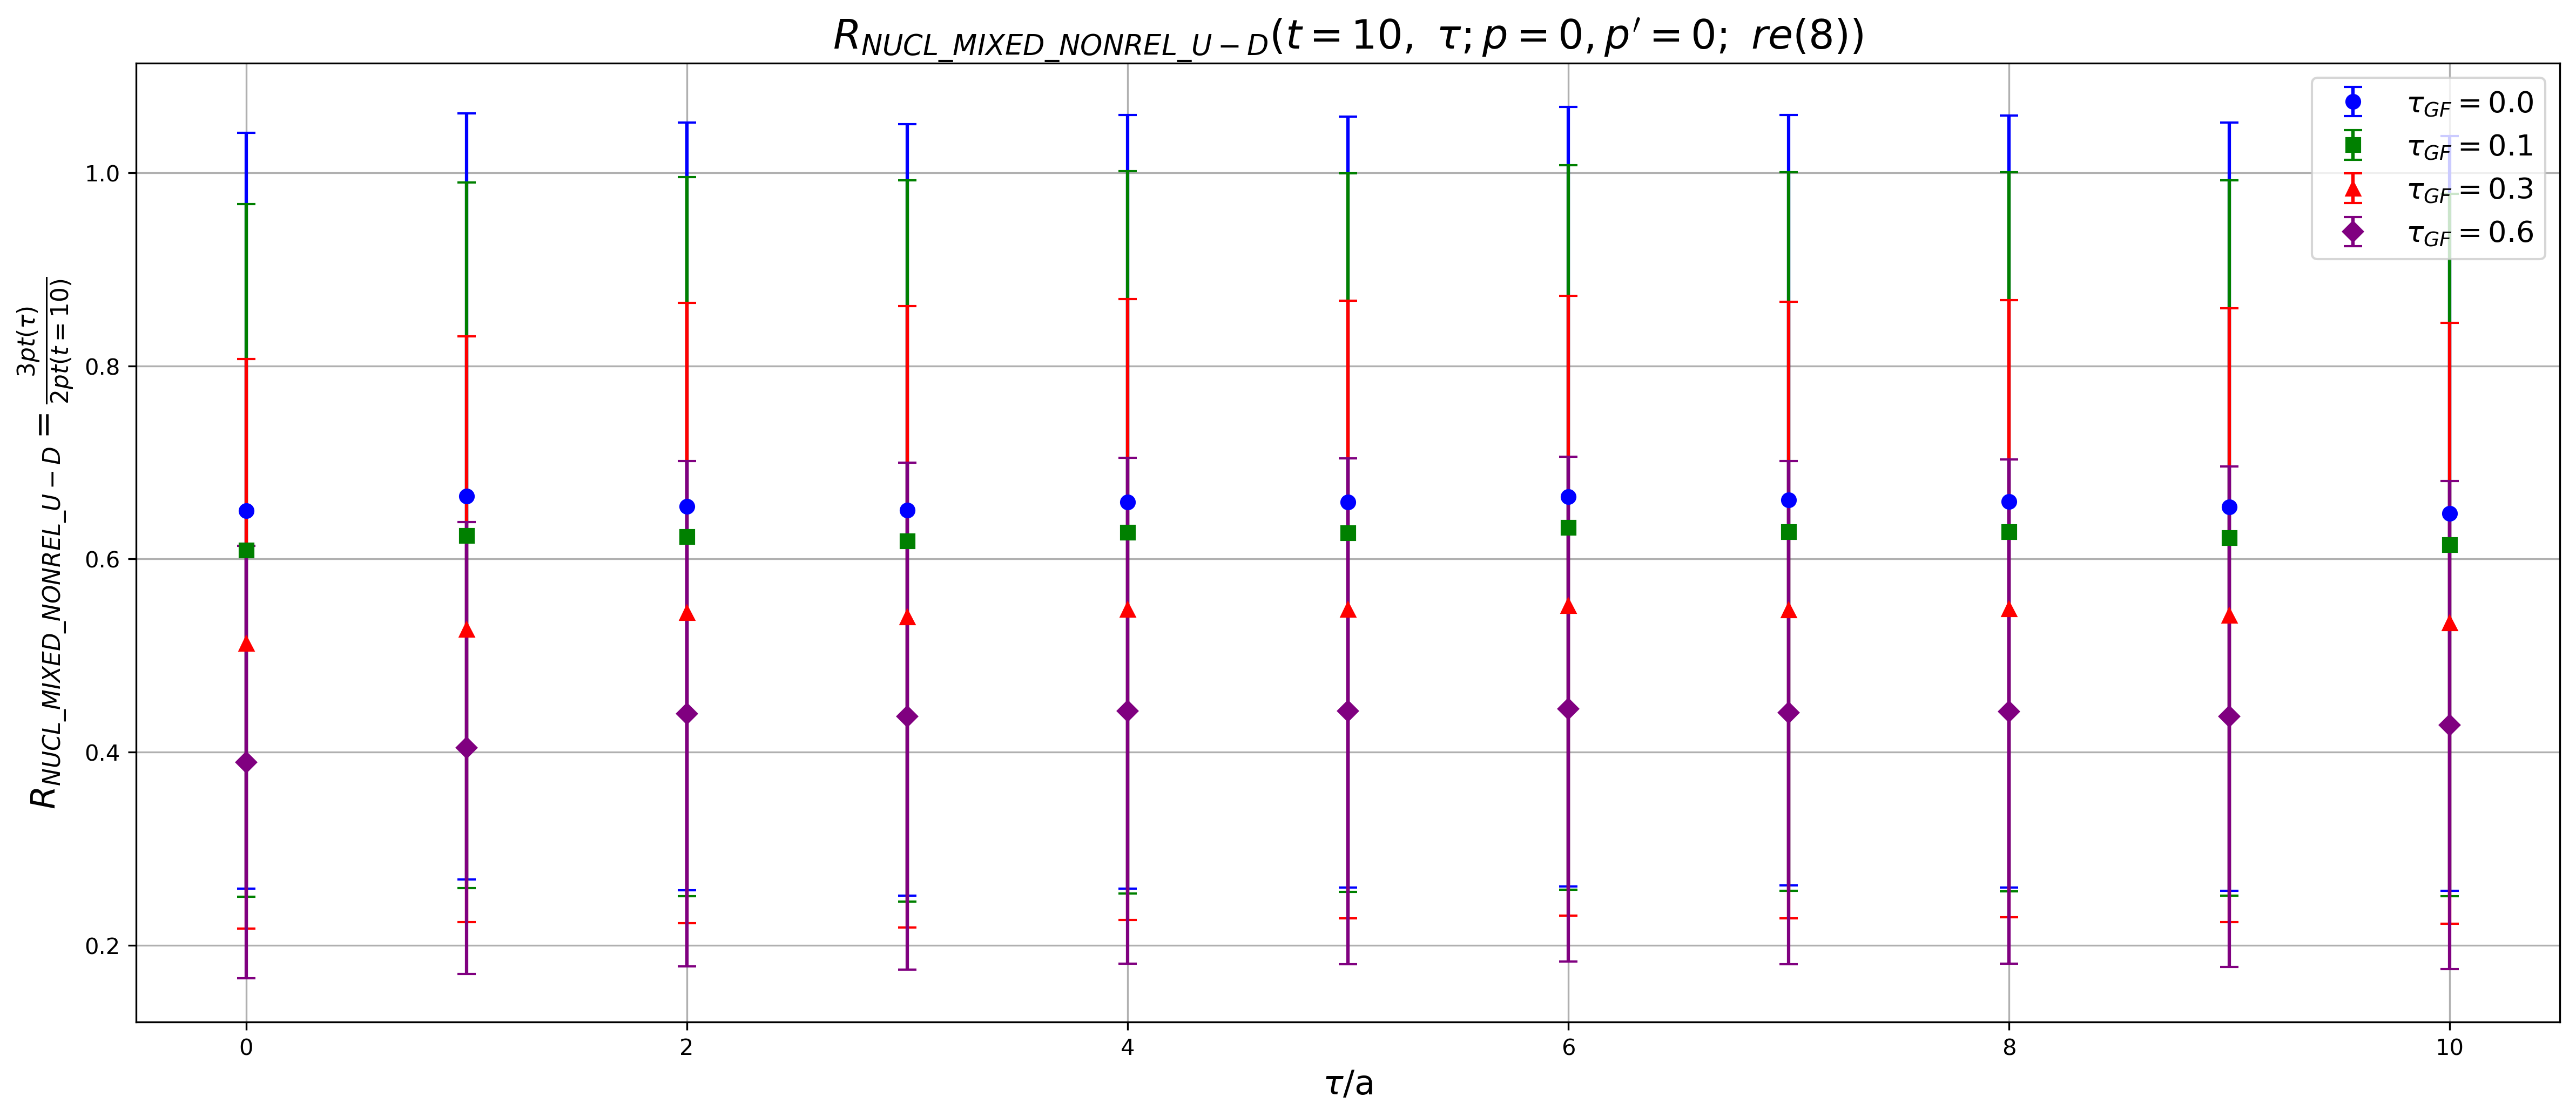

In [8]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

def plot_all_flows(Gn, Num, snk_time):
    flow_times = ["0p0", "0p1", "0p3", "0p6"]
    tau_GF = [0.0, 0.1, 0.3, 0.6]
    colors = ['blue', 'green', 'red', 'purple']
    markers = ['o', 's', '^', 'D']

    plt.figure(figsize=(16, 7), dpi=300)

    for i, WFt in enumerate(flow_times):
        # Load 3pt data
        U_file_path = f"/pscratch/sd/h/hari_8/nEDM_project_LANL/WF{WFt}_NUCL_U_MIXED_NONREL3pt_t{snk_time}.h5"
    
        with h5py.File(U_file_path, "r") as h5_file: 
            U_path_to_observable_cfgb = f"//NUCL_l0_g{Gn}_qz+0_qy+0_qx+0/001"
            U_observable_cfgb = h5_file[U_path_to_observable_cfgb]
            U_values = U_observable_cfgb[Num][()]
        
        U_pt3_data = np.array(U_values)
        U_pt3_data1 = U_pt3_data[28:(28+(snk_time+1))]
        U_pt3_data2 = U_pt3_data[60:(60+(snk_time+1))]
        U_pt3_data3 = U_pt3_data[92:(92+(snk_time+1))]
        U_pt3_data4 = np.concatenate((U_pt3_data[124:], U_pt3_data[0:(snk_time + 1 - (len(U_pt3_data) - 124))]))
    
        D_file_path = f"/pscratch/sd/h/hari_8/nEDM_project_LANL/WF{WFt}_NUCL_D_MIXED_NONREL3pt_t{snk_time}.h5"
    
        with h5py.File(D_file_path, "r") as h5_file: 
            D_path_to_observable_cfgb = f"//NUCL_l0_g{Gn}_qz+0_qy+0_qx+0/001"
            D_observable_cfgb = h5_file[D_path_to_observable_cfgb]
            D_values = D_observable_cfgb[Num][()]
    
        D_pt3_data = np.array(D_values)
        D_pt3_data1 = D_pt3_data[28:(28+(snk_time+1))]
        D_pt3_data2 = D_pt3_data[60:(60+(snk_time+1))]
        D_pt3_data3 = D_pt3_data[92:(92+(snk_time+1))]
        D_pt3_data4 = np.concatenate((D_pt3_data[124:], D_pt3_data[0:(snk_time + 1 - (len(D_pt3_data) - 124))]))
    
        

        # Load 2pt data
        pt2_tree = ET.parse(f"/pscratch/sd/h/hari_8/nEDM_project_LANL/FLOWED_{WFt}_hadspec_Pavg_cl21_48_128_b6p3_m0p2390_m0p2050.0_18448_t28x33y36z28_t60x45y36z28_t92x33y36z28_t124x45y36z28_HP.dat.xml")
        pt2_root = pt2_tree.getroot()
        pt2_values = []
        for elem in pt2_root.findall(".//Shell_Point_Wilson_Baryons/elem[baryon_num='16']/momenta/elem[sink_mom_num='0']/barprop/"):
            pt2_Num_value = elem.find("re").text
            pt2_values.append(float(pt2_Num_value))
        pt2_data = np.array(pt2_values)
        pt2_data1 = pt2_data[(28-28+(snk_time+1))]
        pt2_data2 = pt2_data[(60-28+(snk_time+1))]
        pt2_data3 = pt2_data[(92-28+(snk_time+1))]
        pt2_data4 = pt2_data[(124-28+(snk_time+1))]

        # Compute jackknife
        JK_value = []
        JK_err = []
        for tau in range(len(U_pt3_data1)):
            JK_value_err = Jackknife([(U_pt3_data1[tau]-D_pt3_data1[tau])/pt2_data1,
                                      (U_pt3_data2[tau]-D_pt3_data2[tau])/pt2_data2,
                                      (U_pt3_data3[tau]-D_pt3_data3[tau])/pt2_data3,
                                      (U_pt3_data4[tau]-D_pt3_data4[tau])/pt2_data4,])
            JK_value.append(JK_value_err[0])
            JK_err.append(JK_value_err[1])

        time_plt = np.arange(len(U_pt3_data1))
        plt.errorbar(time_plt, JK_value, yerr=JK_err, fmt=markers[i], markersize=6,
                     capsize=4, color=colors[i], label=f"$\\tau_{{GF}} = {tau_GF[i]}$")

    # Final plot settings
    plt.xlabel("$\\tau$/a", fontsize=15)
    plt.ylabel("$R_{NUCL\\_MIXED\\_NONREL\\_U-D}=\\frac{{3pt(\\tau)}}{{2pt(t={%s})}}$"%(snk_time), fontsize=15)
    plt.title("$R_{NUCL\\_MIXED\\_NONREL\\_U-D}(t={%s},~\\tau;p=0,p^\\prime=0;~{%s} ({%s}))$"%(snk_time, Num, Gn), fontsize=18)
    plt.legend(fontsize=13)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"ReG8_all_flows_t{snk_time}.pdf", dpi=500)
    plt.show()

print("1 cfg, 4 meas")
plot_all_flows(8, "re", 10)

1 cfg, 4 meas


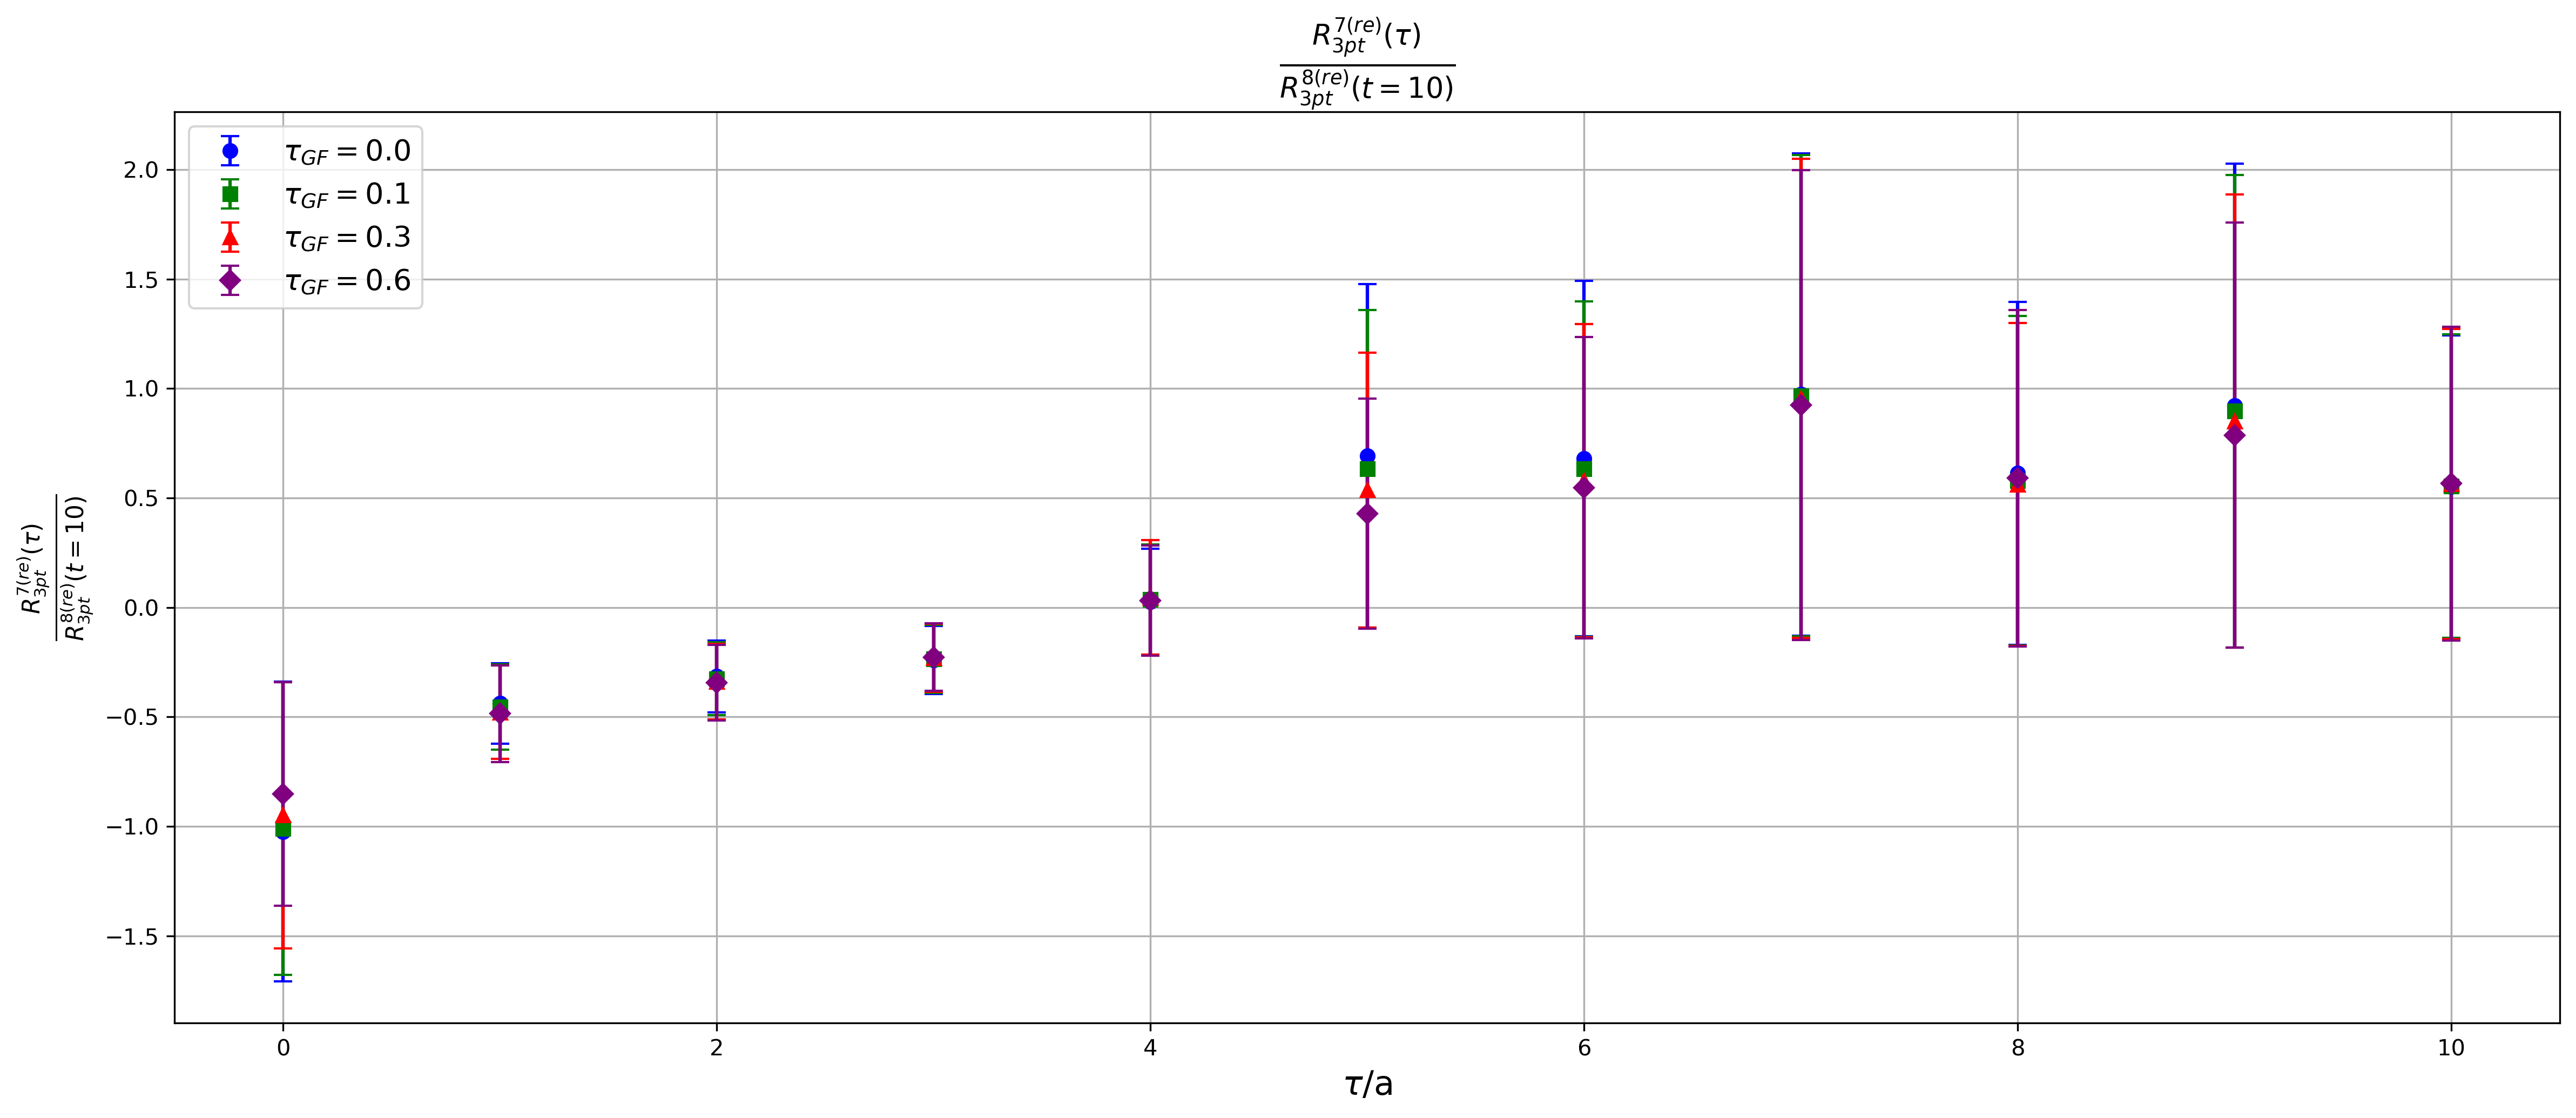

In [10]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
def Jackknife(datalist):
    N = len(datalist)
    theta_bar = np.mean(datalist)
    theta_nminus_theta_bar = []
    for i in range(len(datalist)): #Jackknife
        sliced_list = datalist[:(i)] + datalist[(i+1):]
        theta_n = np.mean(sliced_list)
        theta_nminus_theta_bar.append(np.square(theta_n-theta_bar))
    sigma_sq = ((N-1)/N)*np.sum(theta_nminus_theta_bar)
    return(theta_bar, np.sqrt(sigma_sq))

def plot_all_flows(Ax_Gn, Ax_Num, Ve_Gn, Ve_Num, snk_time):
    flow_times = ["0p0", "0p1", "0p3", "0p6"]
    tau_GF = [0.0, 0.1, 0.3, 0.6]
    colors = ['blue', 'green', 'red', 'purple']
    markers = ['o', 's', '^', 'D']

    plt.figure(figsize=(16, 7), dpi=300)

    for i, WFt in enumerate(flow_times):
        # Load 3pt data
        Ax_U_file_path = f"/pscratch/sd/h/hari_8/nEDM_project_LANL/WF{WFt}_NUCL_U_MIXED_NONREL3pt_t{snk_time}.h5"
    
        with h5py.File(Ax_U_file_path, "r") as h5_file: 
            Ax_U_path_to_observable_cfgb = f"//NUCL_l0_g{Ax_Gn}_qz+0_qy+0_qx+0/001"
            Ax_U_observable_cfgb = h5_file[Ax_U_path_to_observable_cfgb]
            Ax_U_values = Ax_U_observable_cfgb[Ax_Num][()]
        
        Ax_U_pt3_data = np.array(Ax_U_values)
        Ax_U_pt3_data1 = Ax_U_pt3_data[28:(28+(snk_time+1))]
        Ax_U_pt3_data2 = Ax_U_pt3_data[60:(60+(snk_time+1))]
        Ax_U_pt3_data3 = Ax_U_pt3_data[92:(92+(snk_time+1))]
        Ax_U_pt3_data4 = np.concatenate((Ax_U_pt3_data[124:], Ax_U_pt3_data[0:(snk_time + 1 - (len(Ax_U_pt3_data) - 124))]))
    
        Ax_D_file_path = f"/pscratch/sd/h/hari_8/nEDM_project_LANL/WF{WFt}_NUCL_D_MIXED_NONREL3pt_t{snk_time}.h5"
    
        with h5py.File(Ax_D_file_path, "r") as h5_file: 
            Ax_D_path_to_observable_cfgb = f"//NUCL_l0_g{Ax_Gn}_qz+0_qy+0_qx+0/001"
            Ax_D_observable_cfgb = h5_file[Ax_D_path_to_observable_cfgb]
            Ax_D_values = Ax_D_observable_cfgb[Ax_Num][()]
    
        Ax_D_pt3_data = np.array(Ax_D_values)
        Ax_D_pt3_data1 = Ax_D_pt3_data[28:(28+(snk_time+1))]
        Ax_D_pt3_data2 = Ax_D_pt3_data[60:(60+(snk_time+1))]
        Ax_D_pt3_data3 = Ax_D_pt3_data[92:(92+(snk_time+1))]
        Ax_D_pt3_data4 = np.concatenate((Ax_D_pt3_data[124:], Ax_D_pt3_data[0:(snk_time + 1 - (len(Ax_D_pt3_data) - 124))]))
    
        Ve_U_file_path = f"/pscratch/sd/h/hari_8/nEDM_project_LANL/WF{WFt}_NUCL_U_MIXED_NONREL3pt_t{snk_time}.h5"
    
        with h5py.File(Ve_U_file_path, "r") as h5_file: 
            Ve_U_path_to_observable_cfgb = f"//NUCL_l0_g{Ve_Gn}_qz+0_qy+0_qx+0/001"
            Ve_U_observable_cfgb = h5_file[Ve_U_path_to_observable_cfgb]
            Ve_U_values = Ve_U_observable_cfgb[Ve_Num][()]
        
        Ve_U_pt3_data = np.array(Ve_U_values)
        Ve_U_pt3_data1 = Ve_U_pt3_data[28:(28+(snk_time+1))]
        Ve_U_pt3_data2 = Ve_U_pt3_data[60:(60+(snk_time+1))]
        Ve_U_pt3_data3 = Ve_U_pt3_data[92:(92+(snk_time+1))]
        Ve_U_pt3_data4 = np.concatenate((Ve_U_pt3_data[124:], Ve_U_pt3_data[0:(snk_time + 1 - (len(Ve_U_pt3_data) - 124))]))
    
        Ve_D_file_path = f"/pscratch/sd/h/hari_8/nEDM_project_LANL/WF{WFt}_NUCL_D_MIXED_NONREL3pt_t{snk_time}.h5"
    
        with h5py.File(Ve_D_file_path, "r") as h5_file: 
            Ve_D_path_to_observable_cfgb = f"//NUCL_l0_g{Ve_Gn}_qz+0_qy+0_qx+0/001"
            Ve_D_observable_cfgb = h5_file[Ve_D_path_to_observable_cfgb]
            Ve_D_values = Ve_D_observable_cfgb[Ve_Num][()]
    
        Ve_D_pt3_data = np.array(Ve_D_values)
        Ve_D_pt3_data1 = Ve_D_pt3_data[28:(28+(snk_time+1))]
        Ve_D_pt3_data2 = Ve_D_pt3_data[60:(60+(snk_time+1))]
        Ve_D_pt3_data3 = Ve_D_pt3_data[92:(92+(snk_time+1))]
        Ve_D_pt3_data4 = np.concatenate((Ve_D_pt3_data[124:], Ve_D_pt3_data[0:(snk_time + 1 - (len(Ve_D_pt3_data) - 124))]))
    
        
        # Compute jackknife
        JK_value = []
        JK_err = []
        for tau in range(len(Ax_U_pt3_data1)):
            JK_value_err = Jackknife([(Ax_U_pt3_data1[tau]-Ax_D_pt3_data1[tau])/(Ve_U_pt3_data1[tau]-Ve_D_pt3_data1[tau]),
                                      (Ax_U_pt3_data2[tau]-Ax_D_pt3_data2[tau])/(Ve_U_pt3_data2[tau]-Ve_D_pt3_data2[tau]),
                                      (Ax_U_pt3_data3[tau]-Ax_D_pt3_data3[tau])/(Ve_U_pt3_data3[tau]-Ve_D_pt3_data3[tau]),
                                      (Ax_U_pt3_data4[tau]-Ax_D_pt3_data4[tau])/(Ve_U_pt3_data4[tau]-Ve_D_pt3_data4[tau]),])
            JK_value.append(JK_value_err[0])
            JK_err.append(JK_value_err[1])

        time_plt = np.arange(len(Ax_U_pt3_data1))
        plt.errorbar(time_plt, JK_value, yerr=JK_err, fmt=markers[i], markersize=6,
                     capsize=4, color=colors[i], label=f"$\\tau_{{GF}} = {tau_GF[i]}$")

    # Final plot settings
    plt.xlabel("$\\tau$/a", fontsize=15)
    plt.ylabel("$\\frac{{R^{%s ({%s})}_{3pt}(\\tau)}}{{R^{%s ({%s})}_{3pt}(t={%s})}}$"%(Ax_Gn, Ax_Num, Ve_Gn, Ve_Num,snk_time), fontsize=15)
    plt.title("$\\frac{{R^{%s ({%s})}_{3pt}(\\tau)}}{{R^{%s ({%s})}_{3pt}(t={%s})}}$"%(Ax_Gn, Ax_Num, Ve_Gn, Ve_Num,snk_time), fontsize=18)
    plt.legend(fontsize=13)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"AxVe_all_flows_t{snk_time}.pdf", dpi=500)
    plt.show()

print("1 cfg, 4 meas")
plot_all_flows(7, "re",8, "re", 10)